In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Model Loaded


Saving test13.jpeg to test13.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Predicted Class: large cutworm
Confidence: 88.52 %


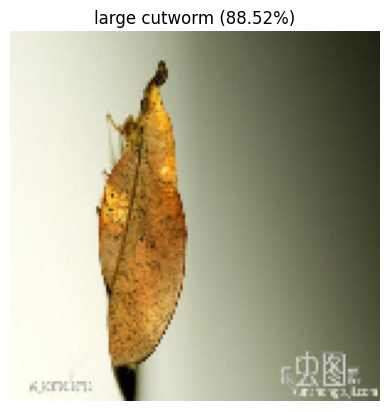

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
from google.colab import files

# ==========================
# MODEL PATH
# ==========================
MODEL_PATH = "/content/drive/MyDrive/Chatbot/pestModel.h5"

IMG_HEIGHT = 150
IMG_WIDTH = 150

CLASS_NAMES = [
    "large cutworm",
    "Locust",
    "Pieris canidia",
    "red spider",
    "yellow rice borer"
]

# ==========================
# Custom Loss (Required)
# ==========================
def confident_categorical_loss(alpha=0.1):
    def loss(y_true, y_pred):
        y_true = K.cast(y_true, dtype='float32')
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        ce_loss = -K.sum(y_true * K.log(y_pred), axis=-1)
        confidence_penalty = alpha * K.sum(K.abs(y_pred - 0.5), axis=-1)
        return ce_loss + confidence_penalty
    return loss

# ==========================
# Load Model
# ==========================
model = load_model(
    MODEL_PATH,
    custom_objects={'loss': confident_categorical_loss(alpha=0.1)}
)

print("Model Loaded")

# ==========================
# Upload Image
# ==========================
uploaded = files.upload()

for filename in uploaded.keys():
    IMAGE_PATH = filename

    img = load_img(IMAGE_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    confidence = np.max(predictions)

    print("Predicted Class:", CLASS_NAMES[predicted_index])
    print("Confidence:", round(float(confidence) * 100, 2), "%")

    plt.imshow(img)
    plt.title(f"{CLASS_NAMES[predicted_index]} ({confidence*100:.2f}%)")
    plt.axis("off")
    plt.show()
